In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [13]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
X,y = make_moons(100,noise=0.25,random_state=2)

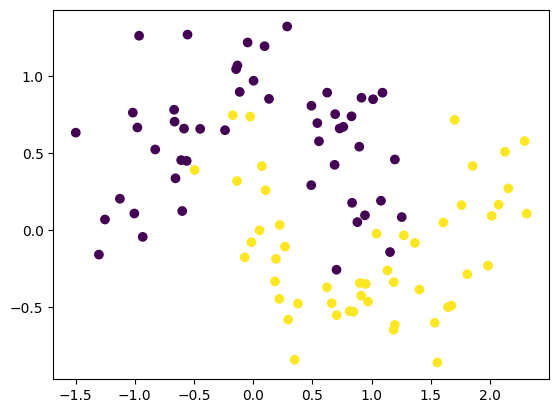

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,input_dim=2,activation='sigmoid'))

model1.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

hist1 = model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


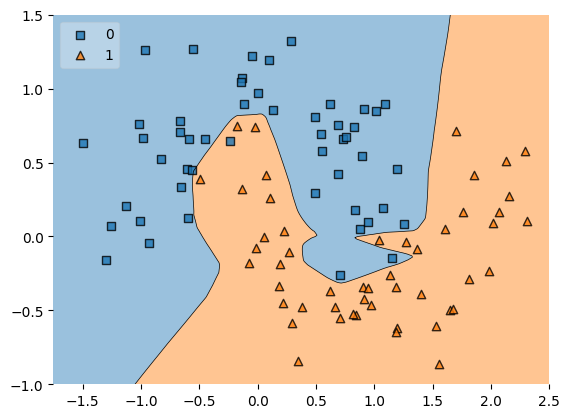

In [11]:
plot_decision_regions(X,y,clf=model1,legend=2)
plt.xlim(-1.75,2.5)
plt.ylim(-1,1.5)
plt.show()

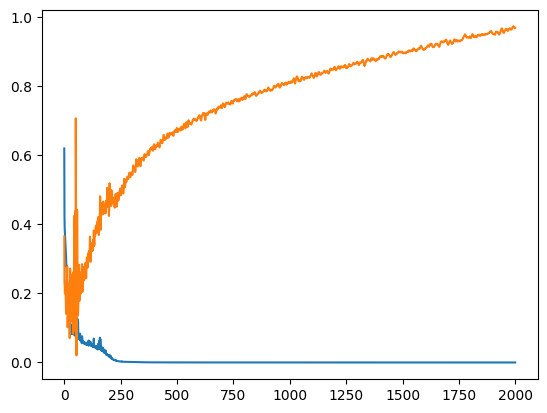

In [8]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])

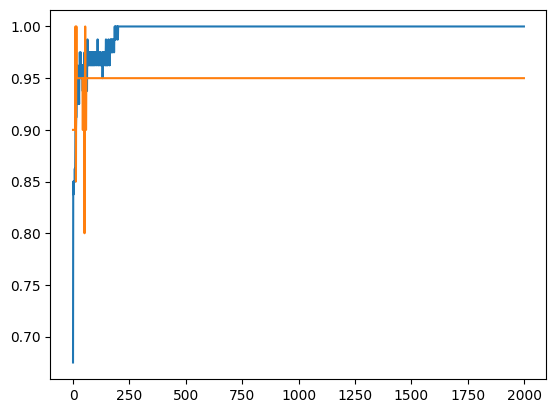

In [9]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])

In [26]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(1,input_dim=2,activation='sigmoid'))

model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
adam =Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

hist2 = model2.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


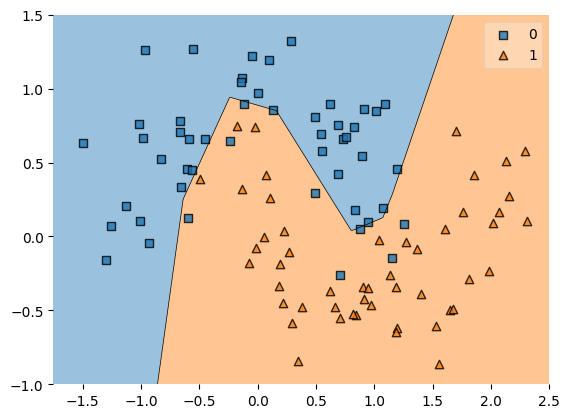

In [28]:
plot_decision_regions(X,y,clf=model2,legend=1)
plt.xlim(-1.75,2.5)
plt.ylim(-1,1.5)
plt.show()

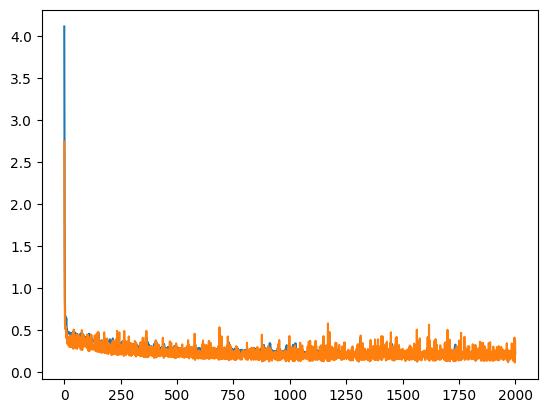

In [30]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])

In [44]:
import pandas as pd
pd.DataFrame(model1.get_weights()[0].T)

,0,1
0,-0.011355,-0.010160
1,-0.361918,0.047810
2,-0.365115,0.274444
3,0.159622,-0.234765
4,-0.312270,-0.074034
...,...,...
123,-0.472832,-0.029139
124,0.266881,0.112648
125,-0.438497,-0.012087
126,0.125565,2.269579


In [62]:
m1w0= model1.get_weights()[0].ravel()
m2w0 = model2.get_weights()[0].ravel()

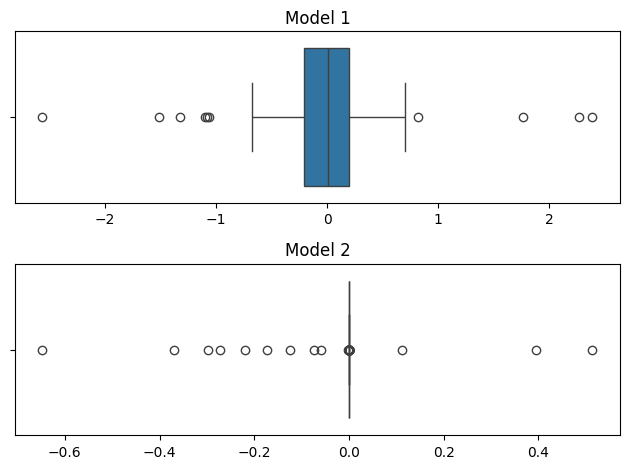

In [77]:
plt.subplot(2,1,1)
plt.title('Model 1')
sns.boxplot(x=m1w0)

plt.subplot(2,1,2)
plt.title('Model 2')
sns.boxplot(x=m2w0)
plt.tight_layout()
plt.show()

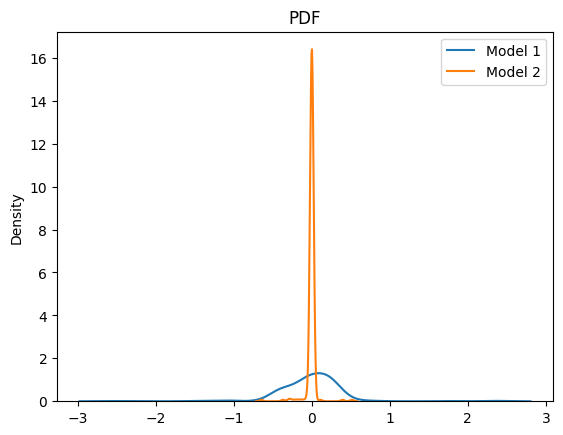

In [92]:
sns.kdeplot(m1w0,label='Model 1')
sns.kdeplot(m2w0,label='Model 2')
plt.title("PDF")
plt.legend()
plt.show()

In [ ]:
`sns.kdeplot